In [6]:
import streamlit as st
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots


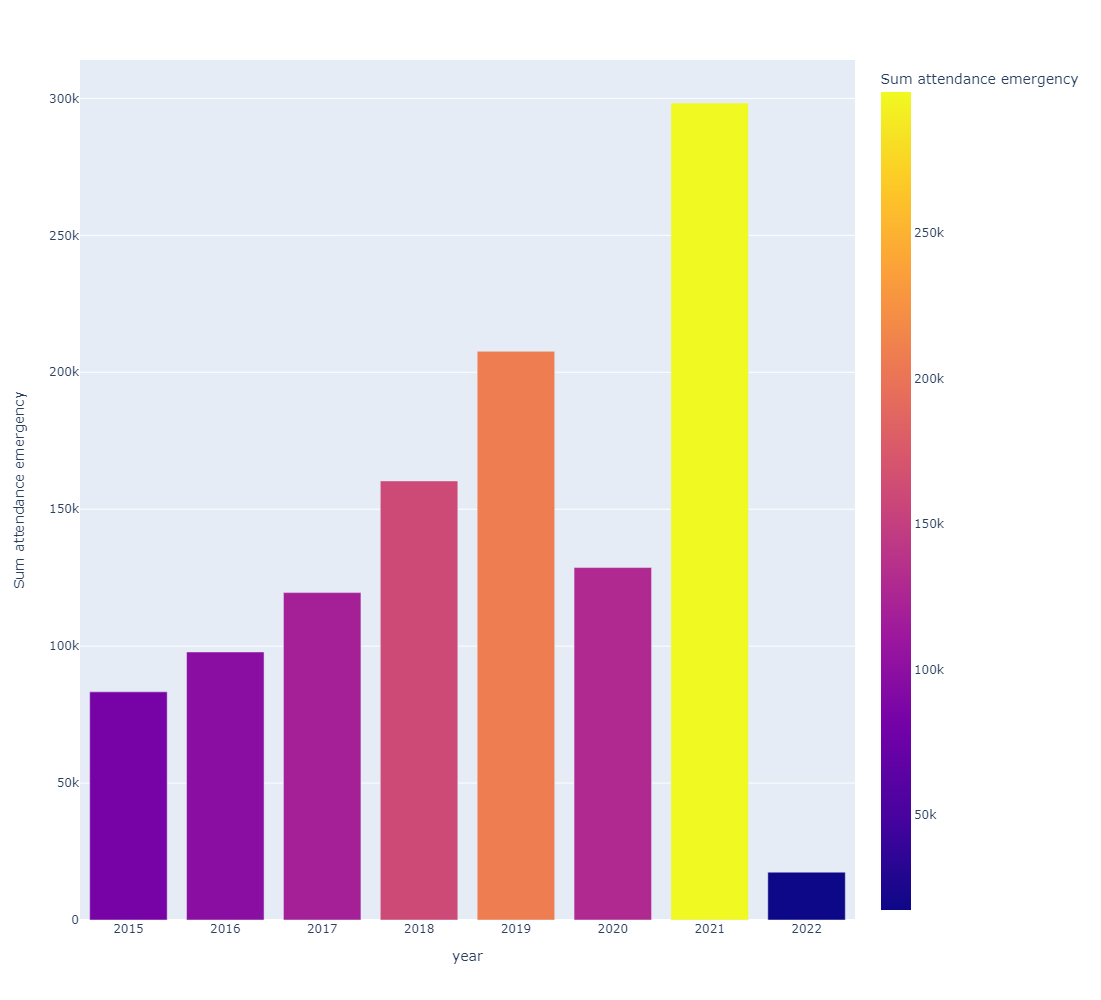

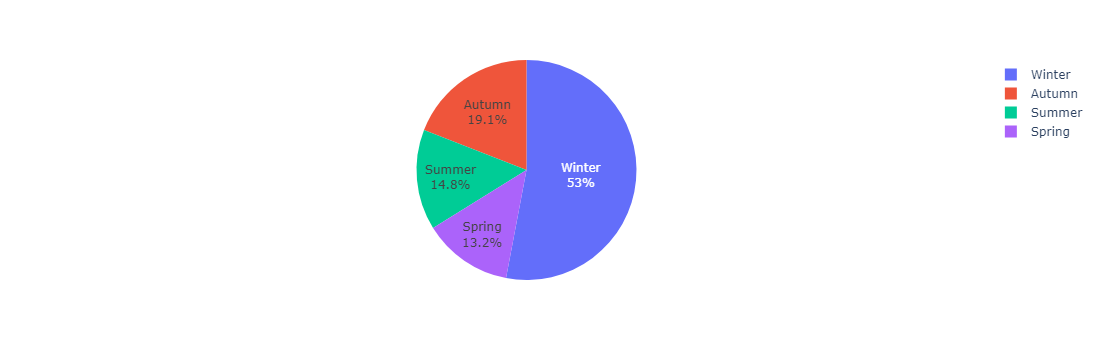

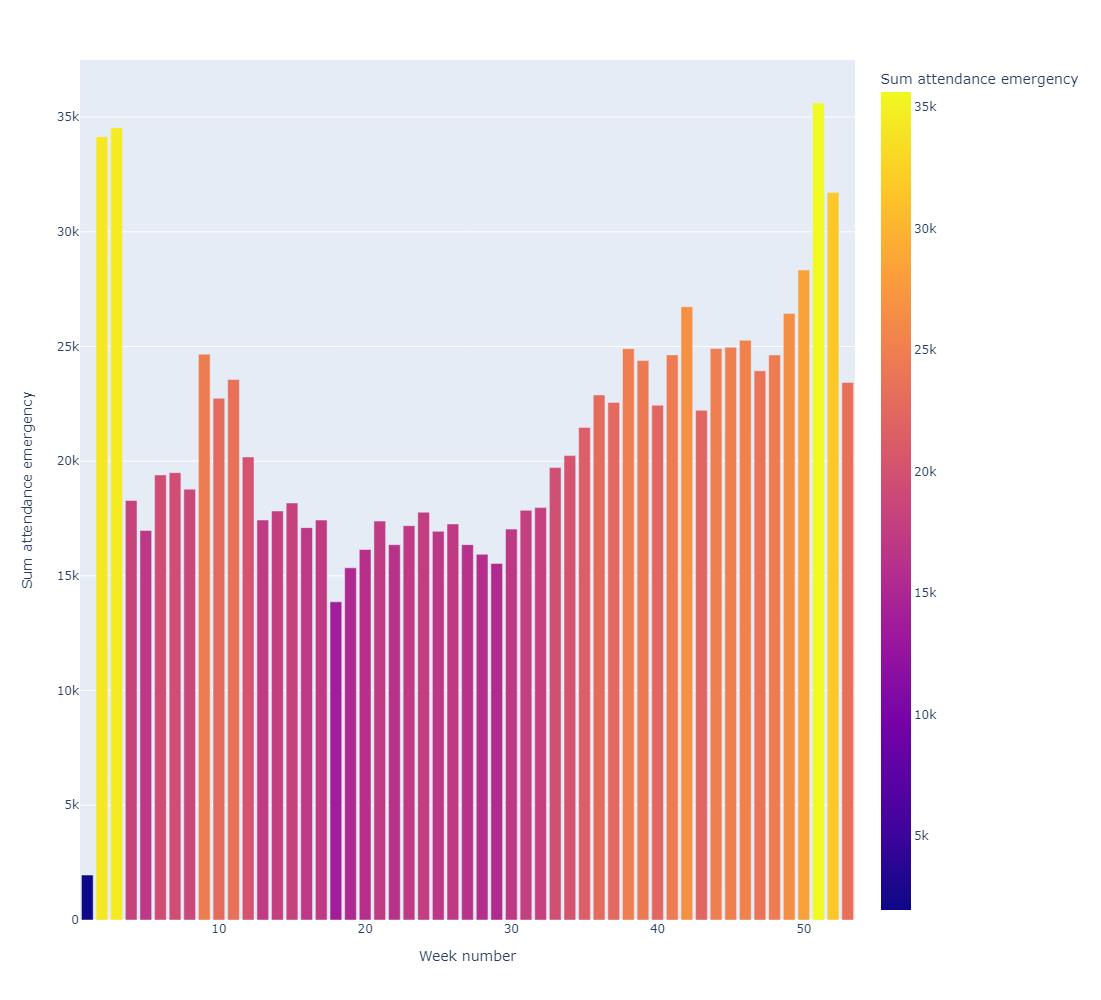

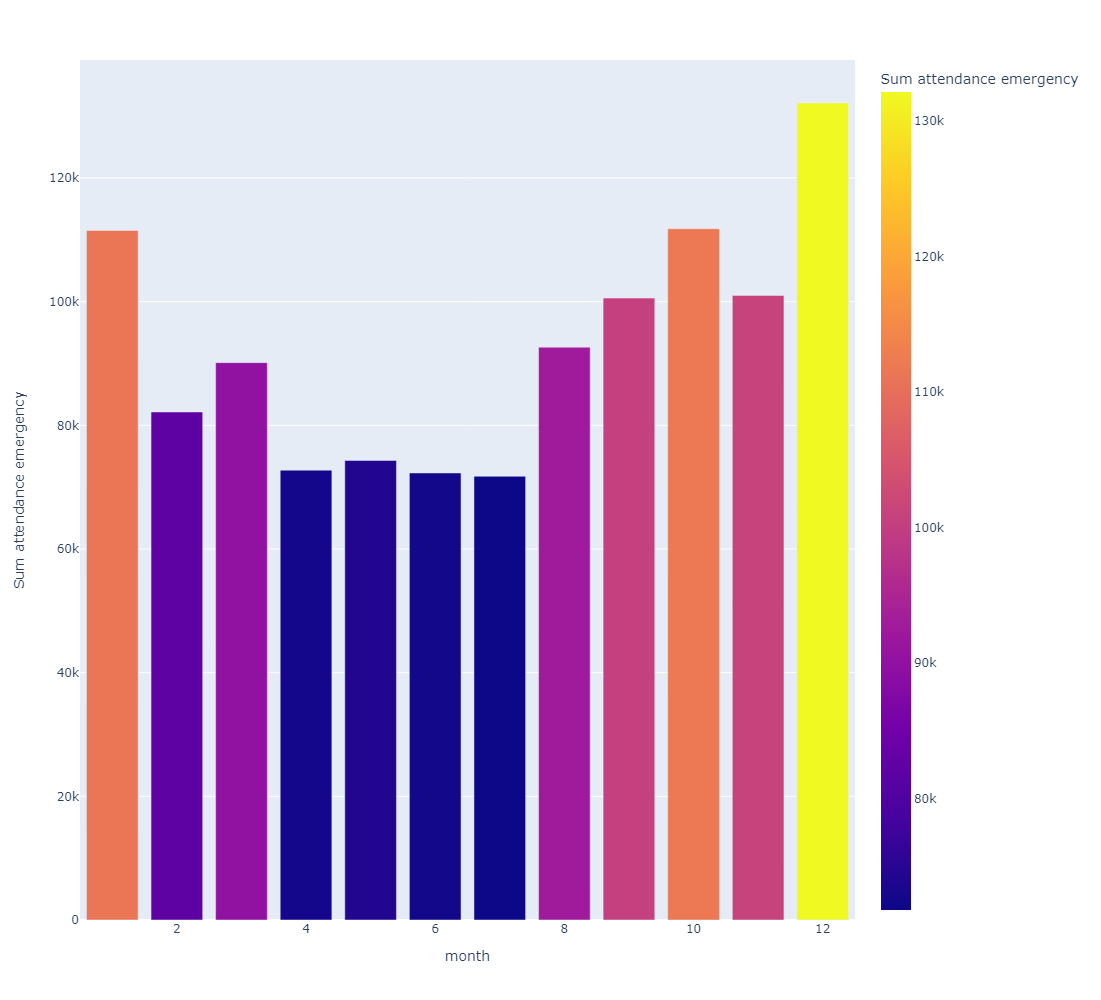

2022-10-25 21:00:46.537 NumExpr defaulting to 4 threads.


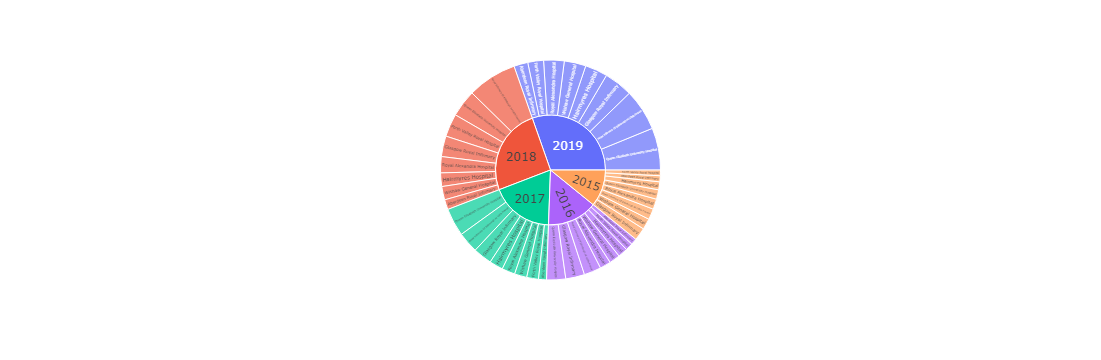

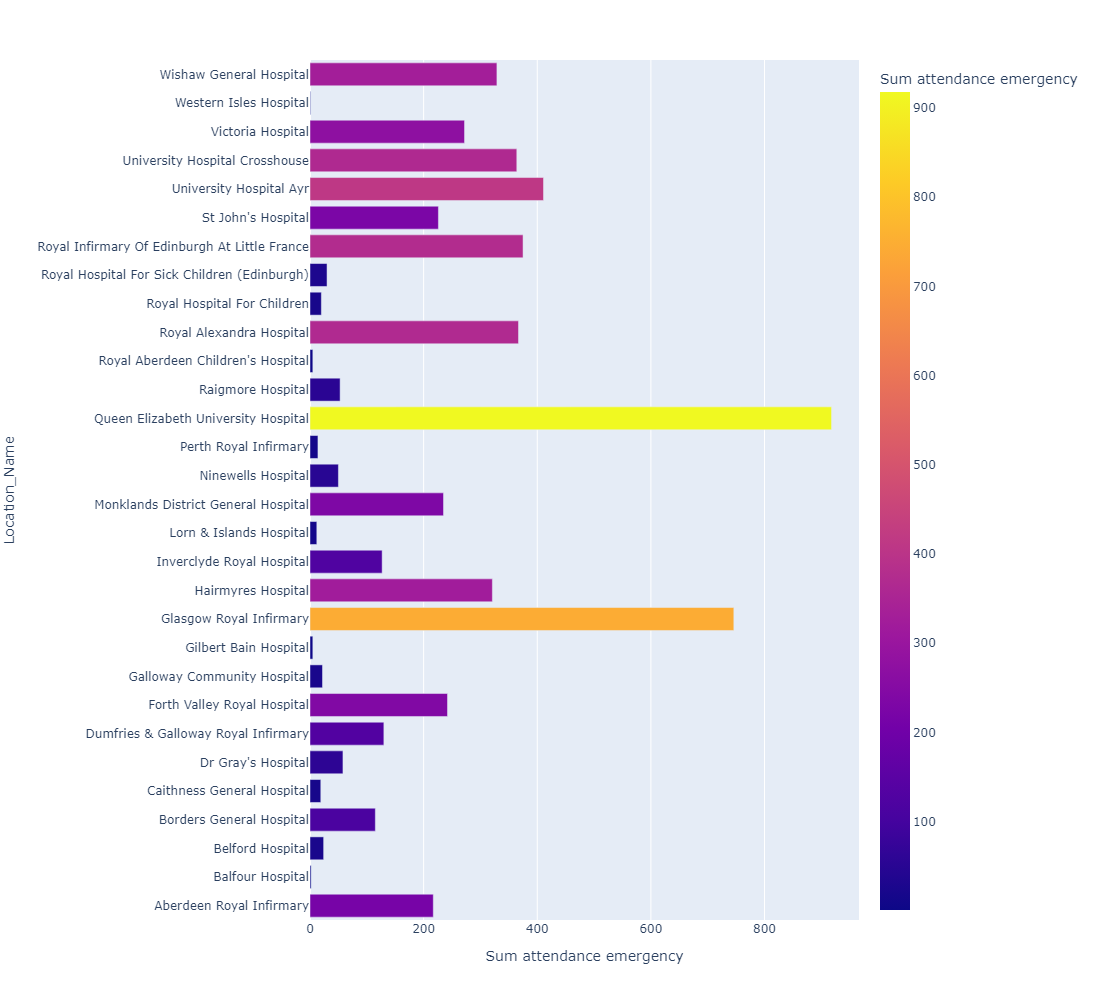

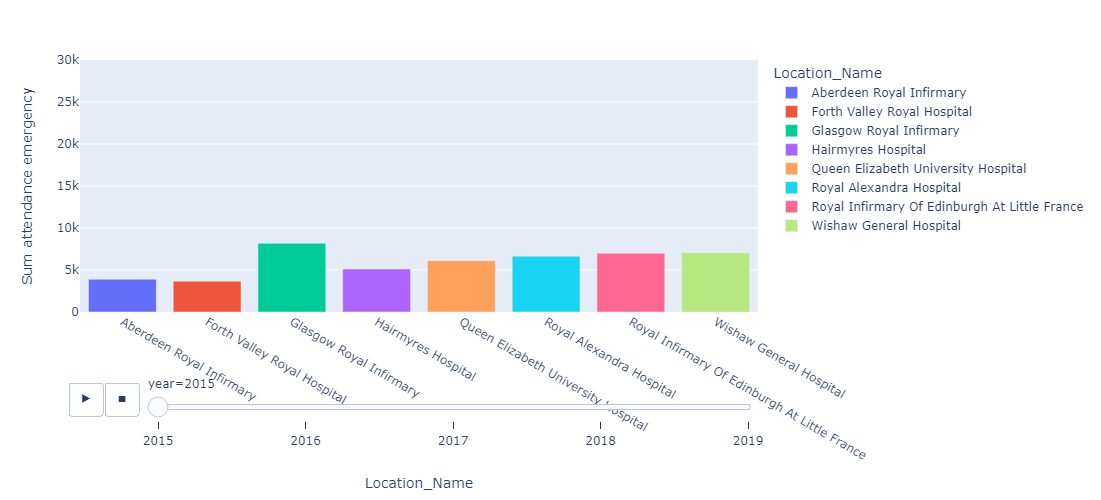

In [8]:
header=st.beta_container()
dataset=st.beta_container()
features=st.beta_container()
features1=st.beta_container()
features2=st.beta_container()
features3=st.beta_container()
model_training=st.beta_container()

with header:
  st.title("Welcome to the predictions lab")
  st.text("In this lab you can costumise your graphs and see the predictions")

with dataset:
  st.header("Attendance in emergency at Scotland hospitals dataset")
  st.text("This a case about the attendance in emergency rooms in the hospitals of Scotland")

  emergency_data= pd.read_csv("datos-emergencia-escocia3.csv")
  st.write(emergency_data.head())
    
with features:
  st.header("Attendance por año y estaciones")
  st.text("Overview de las distribuciones por año y estaciones")

  sel_col, disp_col = st.beta_columns(2)  
    
  st.subheader("Attendance en emergencias por año")
  df = pd.read_csv("datos-emergencia-escocia3.csv",parse_dates=[0])
  dfsize2=df.groupby(["year"]).sum()["Sum attendance emergency"].reset_index()
  fig1 = px.bar(dfsize2, y='Sum attendance emergency',color="Sum attendance emergency",x="year",height=1000)
  fig1.show()

  st.subheader("Attendance por emergencias por estaciones del año")
  dfsize3=df.groupby(["Season2"]).sum()["Sum attendance emergency"].reset_index()
  fig2 = px.pie(dfsize3.reset_index(), values='Sum attendance emergency', names='Season2')
  fig2.update_traces(textposition='inside', textinfo='percent+label')
  fig2.show()

with features1:
  st.header("Attendance por franjas de tiempo menores")
  st.text("Overview por semanas y meses del año")

  st.markdown("*Esta es una descripción más a detalle que la anterior")

  sel_col, disp_col = st.beta_columns(2) 
  
  st.subheader("Attendance por semanas del año")
  dfsize4=df.groupby(["Week number"]).sum()["Sum attendance emergency"].reset_index()
  fig3 = px.bar(dfsize4, y='Sum attendance emergency',color="Sum attendance emergency",x="Week number",height=1000)
  fig3.show()

  st.subheader("Attendance por meses del año")
  dfsize5=df.groupby(["month"]).sum()["Sum attendance emergency"].reset_index()
  fig4 = px.bar(dfsize5, y='Sum attendance emergency',color="Sum attendance emergency",x="month",height=1000)
  fig4.show()


with features2:
  st.header("Attendance per location per year before and after COVID")
  st.text("Overview de las attendance antes y luego del COVID")

  st.markdown("*Esta es una descripción para ver como era el flujo de capacidad en emergencias")

  sel_col, disp_col = st.beta_columns(2) 

  st.subheader("Attendance per location per year before 2020")
  dfafter_2015 = (df['year'] > 2014) & (df['year'] < 2020)
  filtered_df2015=df.loc[dfafter_2015]
  dfsize2015=filtered_df2015.groupby(["year","Location_Name"]).sum()["Sum attendance emergency"].reset_index()
  options = ['Aberdeen Royal Infirmary', 'Forth Valley Royal Hospital',"Glasgow Royal Infirmary","Hairmyres Hospital","Queen Elizabeth University Hospital","Royal Alexandra Hospital","Royal Infirmary Of Edinburgh At Little France","Wishaw General Hospital"]  
  top_hospitals_2015 = dfsize2015.loc[dfsize2015['Location_Name'].isin(options)]
  fig_top_hospitals_2015 = px.sunburst(top_hospitals_2015, path=['year', 'Location_Name'], values='Sum attendance emergency')
  fig_top_hospitals_2015.show()

  st.subheader("Attendance per location in 2020")
  dfafter_2020 = (df['year'] > 2019) & (df['year'] < 2022)
  filtered_df2020=df.loc[dfafter_2020] 
  dfsize2020=filtered_df2020.groupby(["year","Location_Name"]).sum()["Sum attendance emergency"].reset_index()
  withoutNHS_df = dfsize2020[dfsize2020['Location_Name'] != 'NHSScotland']
  fig_dfsize2020 = px.bar(withoutNHS_df , x='Sum attendance emergency',color="Sum attendance emergency",y="Location_Name",height=1000)
  fig_dfsize2020.show()
    
    
with features3:
  st.header("Animation of attendance per location per year after 2020 without NHSScotland")
  st.text("Overview de las attendance antes del COVID")

  st.markdown("*Esta es una descripción para ver como era el flujo de capacidad en emergencias")
      
  fig2015_animation = px.bar(top_hospitals_2015, x="Location_Name", y="Sum attendance emergency", color="Location_Name",
  animation_frame="year", animation_group="Location_Name", range_y=[1,30000],height=500, width=1000)
  fig2015_animation.show()

    
    
with model_training:
  st.header("Training the model")
  st.text("let see the prediccions by week")

  

